# Synthetic expression data from asynchronous random walks on star network

In this series of notebooks, we demonstrate how scBoolSeq can be employed to generate synthetic scRNA-Seq datasets from Boolean states of trajectories of mechanistic Boolean models.

This notebook focuses on a toy model where a transcription factor progressively activates its target genes.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import random
from colomoto.minibn import * # for Boolean network manipulation
from scboolseq import scBoolSeq

# set seed for reproducible results
_rng_seed = 19834650
# use a Generator instead of numpy's singleton
_rng = np.random.default_rng(_rng_seed)
random.seed(_rng_seed)

## Load Boolean network model

In [3]:
bn = BooleanNetwork.load("models/star.bnet")
bn

gene1 <- tf
gene10 <- tf
gene2 <- tf
gene3 <- tf
gene4 <- tf
gene5 <- tf
gene6 <- tf
gene7 <- tf
gene8 <- tf
gene9 <- tf
tf <- 1

# computing graph layout...


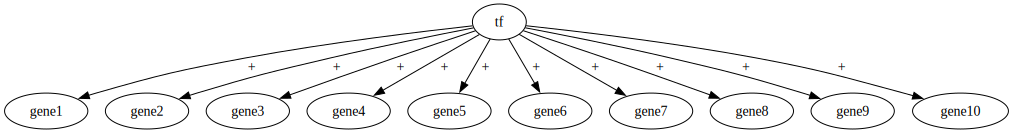

In [4]:
bn.influence_graph()

## Simulation with random walk

With the asynchronous update mode, the activation of the genes can be made in any order. Here, we randomly sample one trajectory of this model, which essentially boils down to selecting a random ordering of genes that get activated.

Let us first specify the initial state of the network:

In [5]:
initial_state = bn.zero()
initial_state["tf"] = 1
initial_state

{'tf': 1,
 'gene1': 0,
 'gene2': 0,
 'gene3': 0,
 'gene4': 0,
 'gene5': 0,
 'gene6': 0,
 'gene7': 0,
 'gene8': 0,
 'gene9': 0,
 'gene10': 0}

Then, we use `minibn` to generate a random walk in the asynchronous dynamics of the Boolean network from the given initial state:

In [6]:
dynamics = FullyAsynchronousDynamics(bn)
random_walk_df = pd.DataFrame(dynamics.random_walk(initial_state, steps=10))
random_walk_df

,tf,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,0,0,1,0,0
4,1,1,0,1,0,0,1,0,1,0,0
5,1,1,0,1,0,0,1,0,1,1,0
6,1,1,0,1,0,0,1,0,1,1,1
7,1,1,0,1,1,0,1,0,1,1,1
8,1,1,1,1,1,0,1,0,1,1,1
9,1,1,1,1,1,0,1,1,1,1,1


## Retrieve reference dataset

In [7]:
%ls data_filtered_vargenes/*csv

data_filtered_vargenes/GSE122466_Retina.csv
data_filtered_vargenes/GSE122466_Retina_vargenes_batch1.csv
data_filtered_vargenes/GSE130973_human_skin.csv
data_filtered_vargenes/GSE156234_Macrophages.csv
data_filtered_vargenes/GSE60361_mouse_brain.csv
data_filtered_vargenes/GSE81682_Hematopoiesis.csv


In [8]:
ref_data = pd.read_csv("data_filtered_vargenes/GSE81682_Hematopoiesis.csv", index_col=0)
ref_data.head()

,8430408G22Rik,Plp1,Zfp947,Bhlhb9,Vps35,Slc18a1,Fam107b,Gm14230,Plekhn1,Ankrd6,9030619P08Rik,Prtn3,Lrrn4,Mrgpre,Gm25926,Plppr3,Memo1,Cdkn1c,Gm2a,Phxr4,B2m,Tbxas1,Glipr2,Tcf15,Trim58,D930028M14Rik,1700010I14Rik,Gm10384,Sla2,Trp53i13,Gm17586,Gypc,Clic5,Tubb4b,AC149090.1,Gm26580,Clec1a,Ccl9,Gimap3,Zscan18,Spi1,Ccl6,2900041M22Rik,Klk8,Gm37637,Gp9,Idh3a,Akr1c13,2810408A11Rik,Npr2,Ephx1,Pik3ip1,ENSMUSG00000043858,Gm26789,Grina,Txnip,Gm26541,Dnajb3,Msn,Gm37124,Srd5a1,Bhlhe40,Pomgnt2,Fcer1g,Gm37298,Lmo1,Rab20,Cd69,Gm2788,Gm14276,Napa,Cd24a,Nsun2,Marveld2,Ms4a4b,Gm17590,Cdk6,Tada2b,Gm5113,Mki67,Btg2,Gnat2,Tcaf1,Slc35e4,Reep2,8430419K02Rik,Pdgfd,H2-K1,Sesn1,Bcap29,Gm21814,Eif5a,Stk25,Maged1,Zfp449,9130604C24Rik,6430590A07Rik,Tcirg1,Il4,Slc35a4,Cysltr2,Ap3m2,Dsel,Cmtm7,Arl8b,Gbx2,Smim10l2a,Cyth4,S1pr4,Gdi1,Hdhd3,Vill,Slc38a6,Calu,Gm16565,Smim3,Sar1a,4833407H14Rik,B230217O12Rik,Ccdc39,Spata2l,Arxes2,Dut,Ifngr1,Rasa3,Fbxl2,Pde4b,Ptp4a3,Cdt1,Fxyd1,Arl11,Shisa8,Dleu7,Tmem173,Atxn10,Rpn2,Ccl3,Nudt16,Kif3c,Hars,Ccl4,Myo1g,Cpq,Cox6a2,Sdc3,Dok2,Fcgrt,Elmo1,Cyc1,Calr,Gpr18,Tbxa2r,Gpr183,Naaa,Gm11110,Alad,Taz,Echdc3,Cd300a,Slc39a4,Zfp128,Gm26819,Ispd,Itm2b,Zfp647,Gm16861,Nek3,Gata2,Prss16,Lppos,Lhcgr,Fundc1,Lat,Tnfrsf26,Prr36,Vldlr,Mfge8,Enkur,Rcor2,Ndn,Btla,Zyx,Cd33,Dkc1,Rab37,Cdcp1,Hoxa9,Oat,Vegfc,Gas6,Oasl2,Tacc1,Colgalt1,Xdh,Rab32,Dusp2,Tmem176a,Gnai3,Rnf13,Elane,Cd48,Mthfd1,Igkc,Fnta,Bok,Ripply3,Ptger2,P2rx7,Wdfy2,Eif1a,Gstm7,Tmem14c,2900018N21Rik,Mpl,Sash3,Tgm2,Gm19569,Ehd3,Cish,Calml4,Mesdc2,Nfil3,Tcn2,Saraf,Meis1,Serpina3g,Pcx,Gpr171,Cks1b,Coa5,Arhgap27os3,Farsa,Ctsl,Iigp1,P2ry14,Cd82,Slc18a2,Cd302,Parp12,Isyna1,S100a8,B130034C11Rik,Arhgap27,Klf1,Gm26740,Cd84,Bag2,Tmem123,Emilin1,4930568A12Rik,Clec11a,Mat2a,Tespa1,Wfdc17,Tspan13,Dyrk2,S100a9,F10,Pde1b,Gcnt2,Ppic,Zfp72,Gm4841,Ckb,C130013H08Rik,Spo11,Ctss,Vwa5a,Serpinb1a,Trib3,Slc28a2,Xbp1,Tsc22d3,Cd74,Nhlrc1,Rac2,Il15,Ift43,Tnfrsf13c,Gm10451,Plod2,Minpp1,Cs,Gm21967,Trim27,Rrm1,Krt18,Rap1b,Anxa2,D130040H23Rik,Tmsb4x,1810034E14Rik,2810021J22Rik,F630028O10Rik,Cyb5r3,B3gnt3,Laptm5,Adam11,Rab17,Pkia,Hist3h2ba,Cyp27a1,Zfp36,Mcm5,Ssc4d,Gm45837,Lmcd1,Fgf3,Car1,Adssl1,Il21r,Slc50a1,Serpinb9,Pttg1ip,Fam83d,Tspan32,Tnfrsf13b,Gdi2,Nim1k,Mapk12,Wfdc18,Thbs1,Chil5,Mpst,Selenop,Gm43852,Hk3,Irgm1,Nceh1,Myl10,Tmx1,Zcchc24,Acsl5,Tnfaip8,4632427E13Rik,Hspa9,Hid1,Gstt1,Il12rb1,Ficd,Bbs10,Esam,Unc93b1,Casp4,F2r,Dynlt3,Adgrg1,Tmem38a,Stap1,Cep170b,Lpxn,Frmd8,Doc2g,Ighv1-23,Hrh2,Bgn,Ifi206,Fes,Apol7e,Srl,Ifi47,Cdca7,Srm,Smagp,Zfp418,Zfp882,Mmp2,Fam32a,Flna,Lyz2,Cd53,Mapk11,Sptbn1,Mapre3,Nr0b2,Ptprc,Gulp1,Cd63,Nsg1,Fam131a,Dntt,Ifi213,Tcp1,Stard8,Clptm1l,Sigirr,Robo3,Il17rb,Mcfd2,Vpreb1,Casp12,Zbtb3,Ppt1,H1f0,C730034F03Rik,Tpst2,Pnrc1,Sdhaf2,Hnrnpdl,Cyp7b1,Ptpre,Slc25a45,Wdr35,Capg,Sf3b3,Gata1,Spry1,Abce1,Rnf180,Golph3l,P2ry10,Adgrg3,Fkbp4,F2rl2,Gbp2,Plcg2,Ccdc189,4930486L24Rik,E230001N04Rik,Itih5,Chrnb1,Gm16386,Thnsl2,Gm16712,Top2a,Gm5577,Nt5c3,Nlrp10,Ctf1,Il18bp,Il1rl2,Gm5148,Car2,Vim,A630033H20Rik,Cd81,Zfp563,Ctla2a,Mfsd2b,Idh2,Tert,Pwwp2b,Atp6ap2,Ces2g,Gba2,4931428F04Rik,Apoe,Sdha,Dlg3,Igkv4-50,Dhx58,Zfp661,Ccr9,Rgs2,Ctsc,Parp8,Tspo2,5430420F09Rik,Pear1,Ltb,Gm26512,AA467197,Unc5cl,Mtpn,Mcm6,Atp2a3,Tyms,Il12a,Celf2,Axl,Tpm4,Gm3739,Cyp2j9,Fxyd5,B230216N24Rik,Trbc2,Fam161b,Gm30948,Apbb1,Igfbp4,Pcp4l1,Rassf5,Cyp2r1,Smoc1,Srgn,Pygm,Gm43200,Gca,Arhgef6,Fah,BC017643,Ak3,Icam1,Gm10505,C1qbp,Efna1,AW112010,Tnks1bp1,Anxa1,Fgf11,Layn,Gm19331,Rbpms2,Tspan3,Ighv9-1,Gm43201,Arrdc1,Hjurp,4921507P07Rik,Sla,Ms4a6b,Zfp551,2810468N07Rik,Tnf,Serp1,Mfap2,Arhgef18,Slc25a29,Hmox1,Pkm,Arhgap15,Ddx39,Fv1,Gnb5,Tes,Lysmd2,Mmp11,Pgrmc1,Gm42979,Efna4,Uba7,Xist,Sumo3,Flt3,Mycn,1300017J02Rik,Scn1b,Rab38,ENSMUSG00000096970,Tnfaip2,Hdac2,Ccr7,Irf6,Mndal,Fut4,Casp1,Slc14a1,Rit1,Ifi203,Zfp93,Calr3,2210010C04Rik,Gm38243,Gm43313,Slc25a5,Bcam,Ighv1-74,Traf3ip3,Lgals9,Gm26982,Clec10a,Klhl8,Islr,Ighv1-76,Crlf3,Ighv1-77,Lcp2,Rapsn,Cd38,Gm37423,Selplg,Clip3,Ccdc157,Uggt2,Mpo,Eya1,Ctso,Gm26917,Rarb,Cmtm6,Metrnl,Rgs1,Ptpn6,Cd1d1,Lyrm1,Prkaa2,Gm4759,Aplp

In [9]:
%time scbool = scBoolSeq().fit(ref_data)
scbool

CPU times: user 1min 31s, sys: 1.46 s, total: 1min 32s
Wall time: 15.9 s


scBoolSeqBinarizer()

## Generate synthetic RNA-Seq data

In [10]:
SEED = 1928327465
n_samples = 300
counts = synth_pseudocounts = scbool.sample_counts(random_walk_df, n_samples_per_state=n_samples, random_state=SEED)

counts = scbool.sample_counts(random_walk_df, n_samples_per_state=n_samples)
counts.head()

To ease post-analysis with STREAM, we generate unique identifiers for each simulated row (cell):

In [11]:
ids = [f"step{x}_{y}"  for y in range(n_samples) for x in random_walk_df.index]
counts.index = ids
counts.index.name = "cellID"
counts

,tf,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
cellID,,,,,,,,,,,
step0_0,11.199946,5.790686,3.239893,1.508778,2.019838,0.000000,2.859050,2.690069,15.004079,1.684236,0.868850
step1_0,10.728647,8.038792,3.366851,3.182303,0.990765,0.000000,3.585934,0.000000,15.404062,1.227158,4.214468
step2_0,9.614120,11.935944,0.000000,4.352651,0.000000,0.000000,3.361628,3.206353,15.721765,0.482383,4.521560
step3_0,9.590053,12.294490,1.882482,10.208256,2.830386,0.000000,4.060899,2.918285,15.987546,0.000000,4.071320
step4_0,10.289548,11.160468,0.000000,8.508488,2.313603,0.251617,10.803090,0.000000,16.070024,1.862096,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
step6_299,10.108256,10.029623,2.105454,9.715552,2.232493,0.000000,9.621485,3.976765,15.557578,7.458399,8.457941
step7_299,10.904978,10.145182,3.111604,7.541061,7.537253,0.099348,10.711258,0.000000,15.447946,9.274170,9.297236
step8_299,9.704970,11.674255,11.341400,8.373131,8.625268,0.000000,9.082755,4.742084,15.915827,7.514682,6.965558


In [12]:
%time synth_scbool = scBoolSeq().fit(counts)

CPU times: user 3.27 s, sys: 439 ms, total: 3.71 s
Wall time: 433 ms


In [13]:
synth_scbool.criteria_.Category.value_counts()

Category
Bimodal     7
Unimodal    3
ZeroInf     1
Name: count, dtype: int64

<Axes: xlabel='Mean', ylabel='Variance'>

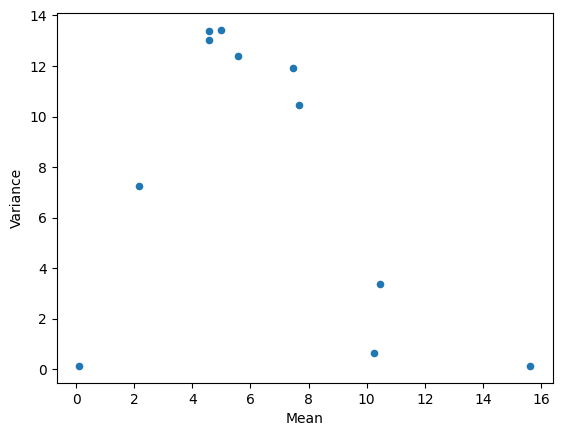

In [14]:
synth_scbool.criteria_.plot.scatter(x="Mean", y="Variance")

<Axes: xlabel='Mean', ylabel='DropOutRate'>

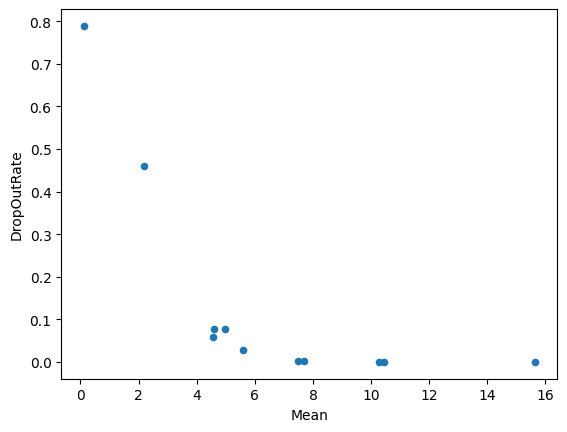

In [15]:
synth_scbool.criteria_.plot.scatter(x="Mean", y="DropOutRate")

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding

In [17]:
def rename_columns(df):
    """ """
    df = pd.DataFrame(df, index=counts.index)
    df.columns = [f"dim{i}" for i in range(df.shape[1])]
    return df

N_COMPONENTS = 5

vis_pipeline = Pipeline([
    ('pca', PCA()),
    ('subset_pca', FunctionTransformer(lambda x: x.iloc[:, :N_COMPONENTS] if isinstance(x, pd.DataFrame) else x[:, ][:, :N_COMPONENTS])),
    ('lle', LocallyLinearEmbedding(n_neighbors=300, n_components=2, random_state=SEED)),
    ('rename_cols', FunctionTransformer(rename_columns))
])

In [18]:
%time _pre_vis = vis_pipeline.fit_transform(synth_pseudocounts)

CPU times: user 1min, sys: 1min 24s, total: 2min 25s
Wall time: 13.2 s


In [19]:
random_walk_df

,tf,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,0,0,1,0,0
4,1,1,0,1,0,0,1,0,1,0,0
5,1,1,0,1,0,0,1,0,1,1,0
6,1,1,0,1,0,0,1,0,1,1,1
7,1,1,0,1,1,0,1,0,1,1,1
8,1,1,1,1,1,0,1,0,1,1,1
9,1,1,1,1,1,0,1,1,1,1,1


In [20]:
counts

,tf,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
cellID,,,,,,,,,,,
step0_0,11.199946,5.790686,3.239893,1.508778,2.019838,0.000000,2.859050,2.690069,15.004079,1.684236,0.868850
step1_0,10.728647,8.038792,3.366851,3.182303,0.990765,0.000000,3.585934,0.000000,15.404062,1.227158,4.214468
step2_0,9.614120,11.935944,0.000000,4.352651,0.000000,0.000000,3.361628,3.206353,15.721765,0.482383,4.521560
step3_0,9.590053,12.294490,1.882482,10.208256,2.830386,0.000000,4.060899,2.918285,15.987546,0.000000,4.071320
step4_0,10.289548,11.160468,0.000000,8.508488,2.313603,0.251617,10.803090,0.000000,16.070024,1.862096,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
step6_299,10.108256,10.029623,2.105454,9.715552,2.232493,0.000000,9.621485,3.976765,15.557578,7.458399,8.457941
step7_299,10.904978,10.145182,3.111604,7.541061,7.537253,0.099348,10.711258,0.000000,15.447946,9.274170,9.297236
step8_299,9.704970,11.674255,11.341400,8.373131,8.625268,0.000000,9.082755,4.742084,15.915827,7.514682,6.965558


In [21]:
import matplotlib as mpl
def colorFader(c1, c2, mix=0):
    """fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    taken from:
    https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python
    """
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2) 


In [24]:
n_active_genes = random_walk_df.sum(axis=1)
n_active_genes.name = "n_active_genes"
n_active_genes = pd.concat(n_samples * [n_active_genes], ignore_index=False)
n_active_genes.index = _pre_vis.index
n_active_genes

cellID
step0_0        1
step1_0        2
step2_0        3
step3_0        4
step4_0        5
              ..
step6_299      7
step7_299      8
step8_299      9
step9_299     10
step10_299    11
Name: n_active_genes, Length: 3300, dtype: int64

In [25]:
vis_frame = _pre_vis.join(n_active_genes)
vis_frame.index.name = "index"
vis_frame = vis_frame.reset_index().drop("index", axis="columns")
vis_frame.head()

,dim0,dim1,n_active_genes
0,-0.025423,-0.019914,1
1,-0.021633,-0.011200,2
2,-0.019738,-0.003051,3
3,-0.011879,0.003006,4
4,-0.009320,0.024486,5


In [26]:
_pre_vis.shape

(3300, 2)

In [27]:
vis_frame.shape

(3300, 3)

In [28]:
vis_frame.tail()

,dim0,dim1,n_active_genes
3295,0.007988,0.013451,7
3296,0.014505,0.017789,8
3297,0.019084,-0.021071,9
3298,0.022065,-0.020417,10
3299,0.021527,-0.003065,11


In [29]:
vis_frame.n_active_genes.value_counts()

n_active_genes
1     300
2     300
3     300
4     300
5     300
6     300
7     300
8     300
9     300
10    300
11    300
Name: count, dtype: int64

In [30]:
levels = vis_frame.n_active_genes
norm_levels = levels / levels.max()
print(norm_levels.shape)
norm_levels.unique()

(3300,)


array([0.09090909, 0.18181818, 0.27272727, 0.36363636, 0.45454545,
       0.54545455, 0.63636364, 0.72727273, 0.81818182, 0.90909091,
       1.        ])

In [31]:
color = norm_levels.apply(lambda x: colorFader("darkblue", "lightgreen", x))
color.name = "color"
vis_frame = vis_frame.join(color)
vis_frame

,dim0,dim1,n_active_genes,color
0,-0.025423,-0.019914,1,#0d168b
1,-0.021633,-0.011200,2,#1a2b8c
2,-0.019738,-0.003051,3,#27418c
3,-0.011879,0.003006,4,#34578d
4,-0.009320,0.024486,5,#416c8d
...,...,...,...,...
3295,0.007988,0.013451,7,#5c978e
3296,0.014505,0.017789,8,#69ad8f
3297,0.019084,-0.021071,9,#76c38f
3298,0.022065,-0.020417,10,#83d890


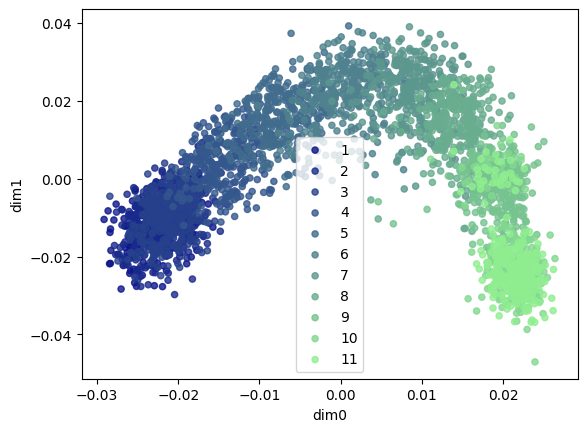

In [32]:
ax = None
for label, frame in vis_frame.groupby('n_active_genes'):
    scatter_kwargs = dict(x='dim0', y='dim1', label=label, c=frame['color'], alpha=.8)
    if ax is not None:
        scatter_kwargs.update({'ax': ax})
    ax = frame.plot.scatter(**scatter_kwargs)
